## Intro to PyTorch

Tutorial link(s):
* https://www.youtube.com/watch?v=c36lUUr864M

### First steps

In [1]:
import torch

In [2]:
x = torch.rand(3)
x

tensor([0.6889, 0.2939, 0.4128])

In [3]:
torch.cuda.is_available()

False

### Tensors

In [4]:
x = torch.empty(2,3) 
x

tensor([[3.4932e-36, 1.4013e-45, 3.4929e-36],
        [1.4013e-45, 9.0067e-35, 1.4013e-45]])

In [5]:
y = torch.rand(2,3)
x.add_(y)
x

tensor([[0.2705, 0.1732, 0.7292],
        [0.1554, 0.4457, 0.9065]])

In [6]:
y_reshaped = y.view(6)
y_reshaped.shape

torch.Size([6])

In [7]:
z = x.numpy()
z

array([[0.27049989, 0.17324698, 0.72922385],
       [0.15536177, 0.44574386, 0.9065053 ]], dtype=float32)

In [8]:
z += 1
z

array([[1.2705   , 1.173247 , 1.7292238],
       [1.1553618, 1.4457438, 1.9065053]], dtype=float32)

In [9]:
# z and x share memory space because they both reside in the CPU
x

tensor([[1.2705, 1.1732, 1.7292],
        [1.1554, 1.4457, 1.9065]])

In [10]:
a = torch.tensor([[10,9],[8,7]])
b = torch.tensor([[1,0],[0,-1]])
torch.mm(a,b)
torch.dot(a[0], b[1])

tensor(-9)

### Autograd

In [11]:
x_grad = torch.randn(3, requires_grad=True)
x_grad

tensor([ 0.0526,  0.6679, -0.0847], requires_grad=True)

In [12]:
# generating backprop function MeanBackward0
z_grad = x_grad + 2 
z_grad = z_grad.mean() 
z_grad

tensor(2.2119, grad_fn=<MeanBackward0>)

In [13]:
print(x_grad.grad)

None


In [14]:
# vector Jacobian product
# no argument: scalar
# tensor argument needed otherwise
z_grad.backward() 
z_grad

tensor(2.2119, grad_fn=<MeanBackward0>)

In [15]:
x_grad.grad

tensor([0.3333, 0.3333, 0.3333])

In [16]:
# x_grad.requires_grad_(False)
# x_grad.detach()
# with torch.no_grad()
y_grad = x_grad.detach()
y_grad

tensor([ 0.0526,  0.6679, -0.0847])

In [17]:
# gradient accumulates
z_grad.backward() 
x_grad.grad
#x_grad.grad.zero_()

tensor([0.6667, 0.6667, 0.6667])

### Backpropagation

In [18]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)

# forward pass
y_hat = w * x

# compute loss
l = (y_hat - y)**2
print(l)

# backward pass
l.backward()
print(w.grad)

# update weights
learning_rate = 0.01
new_w = w - learning_rate * w.grad

# don't forget to zero the gradients
# w.grad.zero_()

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


#### Manual vs. Autograd vs. PyTorch

In [19]:
import numpy as np 
import torch.nn as nn

# here : f = 2 * x
x = np.array([1, 2, 3, 4], dtype=np.float32)
x_auto = torch.tensor(x, dtype=torch.float32)
x_torch = torch.tensor(x, dtype=torch.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)
y_auto = torch.tensor(y, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32)
w = 0.0
w_auto = torch.tensor(w, dtype=torch.float32, requires_grad=True)
w_torch = torch.tensor(w, dtype=torch.float32, requires_grad=True)

# model output
def forward(w, x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# J = MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N * 2x (w*x - y)
def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred - y).mean()

print(f'[M] Prediction before training: f(5) = {forward(w,5):.3f}')
# print(f'[A] Prediction before training: f(5) = {forward(w_auto,5):.3f}')
print(f'[T] Prediction before training: f(5) = {forward(w_torch,5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss_torch = nn.MSELoss()
optimizer = torch.optim.SGD([w_torch], lr=learning_rate)

for epoch in range(n_iters):
    # predict = forward pass
    y_hat = forward(w, x)
    # y_hat_auto = forward(w_auto, x_auto)
    y_hat_torch = forward(w_torch, x_torch)

    # loss
    l = loss(y, y_hat)
    # l_auto = loss(y_auto, y_hat_auto)
    l_torch = loss_torch(y_torch, y_hat_torch)

    # calculate gradients
    dw = gradient(x, y, y_hat)
    # l_auto.backward()
    l_torch.backward()
    optimizer.step()

    # update weights
    w -= learning_rate * dw
    # with torch.no_grad():
    #     w_auto -= learning_rate * w_auto.grad
    # w_auto.grad.zero_()
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        # print(f'epoch {epoch+1}: w_auto = {w_auto:.3f}, loss = {l_auto:.8f}')
        print(f'epoch {epoch+1}: w_torch = {w_torch:.3f}, loss = {l_torch:.8f}')

print(f'[M] Prediction after training: f(5) = {forward(w, 5):.3f}')
# print(f'[A] Prediction after training: f(5) = {forward(w_auto, 5):.3f}')
print(f'[T] Prediction after training: f(5) = {forward(w_torch, 5):.3f}')

[M] Prediction before training: f(5) = 0.000
[T] Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 1: w_torch = 0.300, loss = 30.00000000
epoch 11: w = 2.000, loss = 0.00000033
epoch 11: w_torch = 1.665, loss = 1.16278565
epoch 21: w = 2.000, loss = 0.00000000
epoch 21: w_torch = 1.934, loss = 0.04506890
epoch 31: w = 2.000, loss = 0.00000000
epoch 31: w_torch = 1.987, loss = 0.00174685
epoch 41: w = 2.000, loss = 0.00000000
epoch 41: w_torch = 1.997, loss = 0.00006770
epoch 51: w = 2.000, loss = 0.00000000
epoch 51: w_torch = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000000
epoch 61: w_torch = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 71: w_torch = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 81: w_torch = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
epoch 91: w_torch = 2.000, loss = 0.00000000
[M] Prediction after training: f(5) = 10.000
[T] Prediction after trai

#### Linear Regression

epoch 1: loss = 5862.85937500
epoch 11: loss = 4339.53515625
epoch 21: loss = 3238.61523438
epoch 31: loss = 2442.05541992
epoch 41: loss = 1865.09558105
epoch 51: loss = 1446.78247070
epoch 61: loss = 1143.21533203
epoch 71: loss = 922.73223877
epoch 81: loss = 762.46923828
epoch 91: loss = 645.89489746


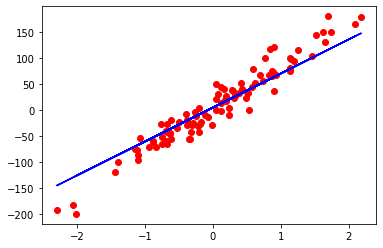

In [20]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# prepare data
X_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32)
y = y.view(y.shape[0],1) # 100 -> 100,1

# build model
n_samples, n_features = X.shape
model = nn.Linear(n_features, 1)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    # calculate gradients (backward pass)
    loss.backward()

    # update weights (and zero gradients out for next iteration)
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: loss = {loss:.8f}')

# plot
y_predicted = model(X).detach().numpy()

plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, y_predicted, 'b')
plt.show()


#### Logistic Regression

In [21]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# prepare the data
breast_cancer = datasets.load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
n_samples, n_features = X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the data
scaler = StandardScaler()
X_train_orig = X_train.copy()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# convert the data to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# reshape our labels
y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

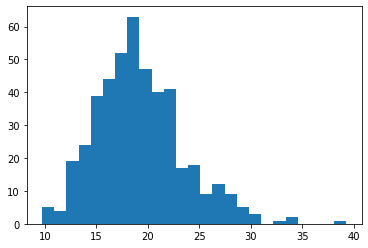

In [22]:
# peek into the data distribution for one of the features
# plt.hist(X_train_orig[:,1], bins=25)
plt.hist(X_train_orig[:,1], bins=25)
plt.show()

In [23]:
n_features

30

In [24]:
# build model
class LogisticRegression(nn.Module):
    def __init__(self, n_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_features, 1)

    def forward(self, X):
        y_predicted = torch.sigmoid(self.linear(X))
        return y_predicted

model = LogisticRegression(n_features)
# model = nn.Linear(n_features, 1)

# loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    y_predicted = model(X_train)
    # y_predicted = torch.sigmoid(y_predicted) # activation function for logistic regression

    # loss
    loss = criterion(y_predicted, y_train)

    # calculate gradients (backward pass)
    loss.backward()

    # update weights (and zero gradients out for next iteration)
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: loss = {loss:.8f}')

# plot
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / (y_test.shape[0])

print(acc)

epoch 1: loss = 1.01718771
epoch 11: loss = 0.73686498
epoch 21: loss = 0.58180779
epoch 31: loss = 0.49036747
epoch 41: loss = 0.43044150
epoch 51: loss = 0.38796011
epoch 61: loss = 0.35609296
epoch 71: loss = 0.33116075
epoch 81: loss = 0.31101552
epoch 91: loss = 0.29432115
tensor(0.9561)


#### Datasets and Dataloader

In [62]:
import math
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader



class WineDataset(Dataset):
    def __init__(self):
        # data loading
        from sklearn.datasets import load_wine        
        dataset = load_wine()
        self.x = torch.from_numpy(dataset['data'])
        self.y = torch.from_numpy(dataset['target'])
        
    def __len__(self) -> int:
        return len(self.x)
    
    def __getitem__(self, index: int):
        return self.x[index], self.y[index]

In [89]:
dataset = load_wine()
# x = torch.from_numpy(dataset['data'])
# y = torch.from_numpy(dataset['target'])
x = dataset['data']
y = dataset['target']
n_samples = y.shape[0]
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [64]:
dataset = WineDataset()
# increasing the num_workers causes an error presumably related to running this in Jupyter
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=0)
dataiter = iter(dataloader)
data = dataiter.next()
features, labels = data
print(features, labels)

tensor([[1.3500e+01, 3.1200e+00, 2.6200e+00, 2.4000e+01, 1.2300e+02, 1.4000e+00,
         1.5700e+00, 2.2000e-01, 1.2500e+00, 8.6000e+00, 5.9000e-01, 1.3000e+00,
         5.0000e+02],
        [1.1760e+01, 2.6800e+00, 2.9200e+00, 2.0000e+01, 1.0300e+02, 1.7500e+00,
         2.0300e+00, 6.0000e-01, 1.0500e+00, 3.8000e+00, 1.2300e+00, 2.5000e+00,
         6.0700e+02],
        [1.2360e+01, 3.8300e+00, 2.3800e+00, 2.1000e+01, 8.8000e+01, 2.3000e+00,
         9.2000e-01, 5.0000e-01, 1.0400e+00, 7.6500e+00, 5.6000e-01, 1.5800e+00,
         5.2000e+02],
        [1.2420e+01, 2.5500e+00, 2.2700e+00, 2.2000e+01, 9.0000e+01, 1.6800e+00,
         1.8400e+00, 6.6000e-01, 1.4200e+00, 2.7000e+00, 8.6000e-01, 3.3000e+00,
         3.1500e+02]], dtype=torch.float64) tensor([2, 1, 2, 1])


In [65]:
# training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward, backward, update
        if not (i+1) % 5:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, {inputs.shape}')


178 45
epoch 1/2, step 5/45, torch.Size([4, 13])
epoch 1/2, step 10/45, torch.Size([4, 13])
epoch 1/2, step 15/45, torch.Size([4, 13])
epoch 1/2, step 20/45, torch.Size([4, 13])
epoch 1/2, step 25/45, torch.Size([4, 13])
epoch 1/2, step 30/45, torch.Size([4, 13])
epoch 1/2, step 35/45, torch.Size([4, 13])
epoch 1/2, step 40/45, torch.Size([4, 13])
epoch 1/2, step 45/45, torch.Size([2, 13])
epoch 2/2, step 5/45, torch.Size([4, 13])
epoch 2/2, step 10/45, torch.Size([4, 13])
epoch 2/2, step 15/45, torch.Size([4, 13])
epoch 2/2, step 20/45, torch.Size([4, 13])
epoch 2/2, step 25/45, torch.Size([4, 13])
epoch 2/2, step 30/45, torch.Size([4, 13])
epoch 2/2, step 35/45, torch.Size([4, 13])
epoch 2/2, step 40/45, torch.Size([4, 13])
epoch 2/2, step 45/45, torch.Size([2, 13])


#### Transforms

In [94]:
import math
import numpy as np
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader

from sklearn.datasets import load_wine

class WineDataset(Dataset):
    def __init__(self, transform=None):
        # data loading
        from sklearn.datasets import load_wine        
        dataset = load_wine()
        self.x = dataset['data']
        self.y = dataset['target']
        self.transform = transform
        
    def __len__(self) -> int:
        return len(self.x)
    
    def __getitem__(self, index: int):
        sample = self.x[index], np.ndarray(self.y[index])
        if self.transform is not None:
            sample = self.transform(sample)
        return sample

class ToTensor():
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform():
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets


In [99]:
# dataset = WineDataset(transform=ToTensor())
dataset = WineDataset(transform=None)
data = dataset[0]
features, labels = data
print(features)

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)

data = dataset[0]
features, labels = data
print(features)
print(type(features), type(labels))

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03], dtype=torch.float64)
<class 'torch.Tensor'> <class 'torch.Tensor'>


#### Cross Entropy

In [122]:
def cross_entropy(predicted, actual):
    # no need to np.sum OR / float(predicted.shape[0])
    # due to one-hot encoding of actual
    loss = np.dot( -actual, np.log(predicted) )
    return loss

y = np.array([1,0,0])
# example good/bad output of softmax
y_pred_good = np.array([0.7,0.2,0.1])
y_pred_bad = np.array([0.1,0.3,0.6])

l1 = cross_entropy(y_pred_good, y)
l2 = cross_entropy(y_pred_bad, y)

print(f'loss (good): {l1:.4f}')
print(f'loss (bad): {l2:.4f}')

loss (good): 0.3567
loss (bad): 2.3026


In [123]:
import numpy as np
import torch 
import torch.nn as nn
# Multi-class
from torch.nn import CrossEntropyLoss
# For 2 classes use BCELoss + sigmoid at the end!

In [131]:
# not one-hot encoded prediction
y = torch.tensor([0])

# example good/bad output. no softmax
# n_samples x n_classes -> 1x3
y_pred_good = torch.tensor([ [2.0,1.0,0.1] ])
y_pred_bad = torch.tensor([ [0.5,2.5,0.3] ])

loss = CrossEntropyLoss()

l1 = loss(y_pred_good, y)
l2 = loss(y_pred_bad, y)

print(f'loss (good): {l1.item():.4f}')
print(f'loss (bad): {l2.item():.4f}')

pred_val1, pred_idx1 = torch.max(y_pred_bad, 1)
pred_val1, pred_idx1

loss (good): 0.4170
loss (bad): 2.2200


(tensor([2.5000]), tensor([1]))

### Activation Functions

In [133]:
import numpy as np
import torch 
import torch.nn as nn

In [134]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out